 ## PGE 383 HOMEWORK 6

 ### Daniel McAllister-Ou



 Imports :

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
import scipy


 Define Table 1 data:

In [17]:
# Set average reservoir pressure 
Pavg = 408.2 # psia
Test = np.array([1, 2, 3, 4])
Pwf = np.array([403.1,394.0,378.5,362.6]) # psia
qg = np.array([4.288,9.265,15.552,20.177]) # MMscf/d    

Test1_df = pd.DataFrame({'Test': Test, 'Pwf': Pwf, 'qg': qg})
Test1_df.head()



,Test,Pwf,qg
0,1,403.1,4.288
1,2,394.0,9.265
2,3,378.5,15.552
3,4,362.6,20.177


 ### Question 1

 Analyze AOF using empircal deliverablity equation

 - qg = C(Pavg^2 - Pwf^2)



 Theoretical deliverability can be calculated using the formula:

 - Pavg^2 - Pwf^2 = a*qg + b*qg^2

 or

 - (Pavg^2 - Pwf^2)/qg = a + b*qg





In [18]:
gas_drawdown = Pavg**2 - Pwf**2

def empirical_deliverability(drawdown, C):
    return C * drawdown

C_opt, _ = scipy.optimize.curve_fit(empirical_deliverability, gas_drawdown, qg)
C = C_opt[0]
print(f"Estimated deliverability constant (C): {C:.4f} MMscf/d/psia^2")


gas_drawdown_over_qg = (Pavg**2 - Pwf**2)/qg

def theoretical_deliverability(gas_drawdown_over_qg, a, b):
    return b * gas_drawdown_over_qg + a

b, a = np.polyfit(qg, gas_drawdown_over_qg, 1)
print("Theoretical Deliverability Params:")
print(f"a = {a:.4f}")
print(f"b = {b:.4f}")  


Estimated deliverability constant (C): 0.0006 MMscf/d/psia^2
Theoretical Deliverability Params:
a = 766.2667
b = 48.1665


 Functions for calculating qg from gas drawdown using theoretical and empirical deliverability:

In [19]:
def qg_from_empirical_deliverability(gas_drawdown, C):
    """
    Calculate qg from gas drawdown using the empirical deliverability equation.
    
    Parameters
    ----------
    gas_drawdown : float or array-like
        Gas drawdown (Pavg^2 - Pwf^2)
    C : float
        Deliverability constant from empirical fit
    
    Returns
    -------
    qg : ndarray or float
        Gas flow rate corresponding to the given gas drawdown
    """
    return empirical_deliverability(gas_drawdown, C)

def qg_from_theoretical_deliverability(gas_drawdown, a, b):
    """
    Calculate qg from gas drawdown using the theoretical deliverability equation.
    
    Parameters
    ----------
    gas_drawdown : float or array-like
        Gas drawdown (Pavg^2 - Pwf^2)
    a : float
        Linear coefficient from theoretical fit
    b : float
        Quadratic coefficient from theoretical fit
    
    Returns
    -------
    qg : ndarray or float
        Gas flow rate corresponding to the given gas drawdown
    """
    
    # Coefficients for the quadratic equation: b*qg^2 + a*qg - gas_drawdown = 0
    A = b
    B = a
    C = -gas_drawdown

    discriminant = B**2 - 4*A*C

    if np.any(discriminant < 0):
        raise ValueError("Negative discriminant encountered. No real solution.")

    sqrt_disc = np.sqrt(discriminant)

    qg_pos = (-B + sqrt_disc) / (2*A)
    qg_neg = (-B - sqrt_disc) / (2*A)

    # Return the positive root as the physical solution
    return qg_pos if np.all(qg_pos >= 0) else qg_neg


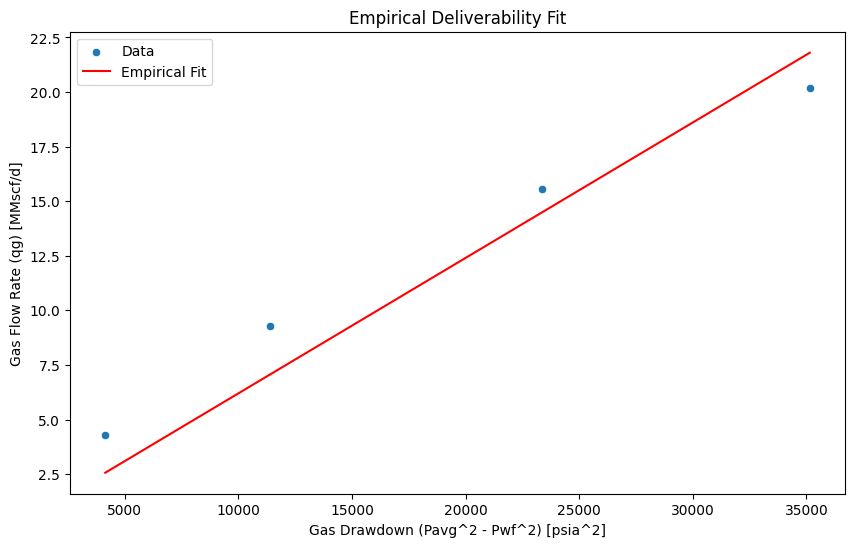

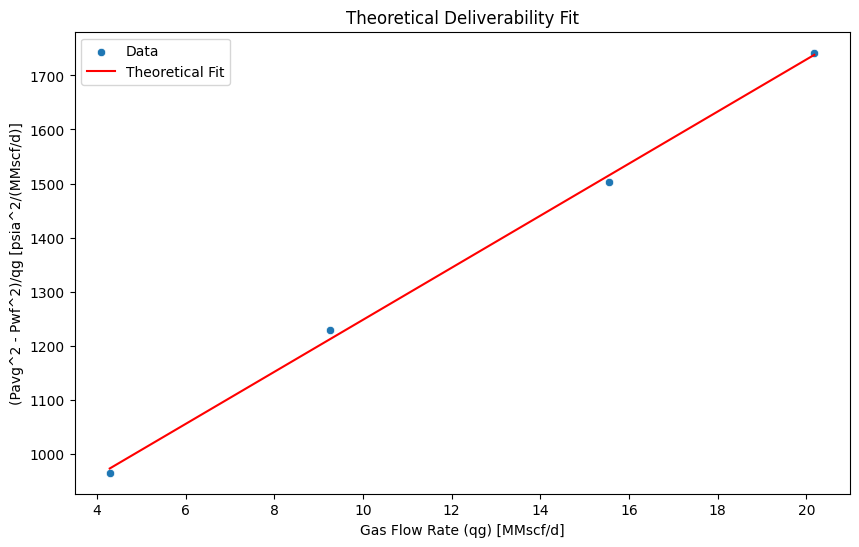

In [20]:
# Plot fit results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gas_drawdown, y=qg, label='Data')
x_fit = np.linspace(min(gas_drawdown), max(gas_drawdown), 100)
y_fit_empirical = empirical_deliverability(x_fit, C)
plt.plot(x_fit, y_fit_empirical, color='red', label='Empirical Fit')
plt.xlabel('Gas Drawdown (Pavg^2 - Pwf^2) [psia^2]')
plt.ylabel('Gas Flow Rate (qg) [MMscf/d]')
plt.title('Empirical Deliverability Fit')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=qg, y=gas_drawdown_over_qg, label='Data', ax=ax)
x_fit = np.linspace(min(qg), max(qg), 100)
y_fit_theoretical = theoretical_deliverability(x_fit, a, b)
ax.plot(x_fit, y_fit_theoretical, color='red', label='Theoretical Fit')
ax.set_xlabel('Gas Flow Rate (qg) [MMscf/d]')
ax.set_ylabel('(Pavg^2 - Pwf^2)/qg [psia^2/(MMscf/d)]')
ax.set_title('Theoretical Deliverability Fit')
ax.legend()
plt.show()



 Plot of Qg vs Pwf with empirical and theoretical curves

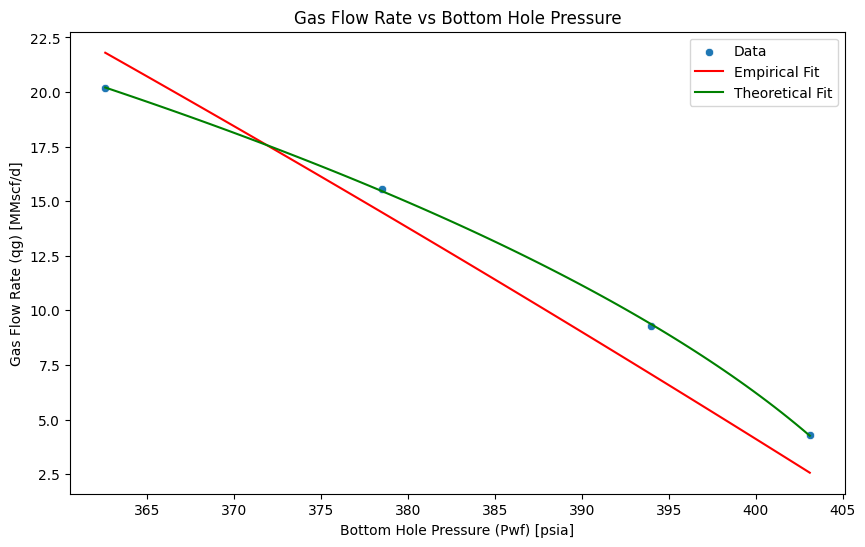

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=Test1_df,x='Pwf', y='qg', label='Data', ax=ax)

Pwf_fit = np.linspace(min(Test1_df['Pwf']), max(Test1_df['Pwf']), 100)
gas_drawdown_fit = Pavg**2 - Pwf_fit**2
qg_empirical_fit = qg_from_empirical_deliverability(gas_drawdown_fit, C)
qg_theoretical_fit = qg_from_theoretical_deliverability(gas_drawdown_fit, a, b)


ax.plot(Pwf_fit, qg_empirical_fit, color='red', label='Empirical Fit')
ax.plot(Pwf_fit, qg_theoretical_fit, color='green', label='Theoretical Fit')
ax.set_xlabel('Bottom Hole Pressure (Pwf) [psia]')
ax.set_ylabel('Gas Flow Rate (qg) [MMscf/d]')
ax.set_title('Gas Flow Rate vs Bottom Hole Pressure')
plt.legend()
plt.show()


 AOF:

In [22]:

AOF_from_empirical = qg_from_empirical_deliverability(Pavg**2, C)
AOF_from_theoretical = qg_from_theoretical_deliverability(Pavg**2, a, b)

print(f'Absolute Open Flow (AOF) from Empirical: {AOF_from_empirical:.4f} MMscf/d')
print(f'Absolute Open Flow (AOF) from Theoretical: {AOF_from_theoretical:.4f} MMscf/d')


Absolute Open Flow (AOF) from Empirical: 103.3391 MMscf/d
Absolute Open Flow (AOF) from Theoretical: 51.3977 MMscf/d
